In [1]:
# import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds=pd.read_csv('sales dataset.csv')

In [3]:
display(ds)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
ds=ds.drop('Unnamed: 0',axis=1)

In [6]:
display(ds)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
ds.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [9]:
ds=ds.astype({'TV':'int','Radio':'int','Newspaper':'int','Sales':'int'})

In [10]:
ds

,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,9
3,151,41,58,18
4,180,10,58,12
...,...,...,...,...
195,38,3,13,7
196,94,4,8,9
197,177,9,6,12
198,283,42,66,25


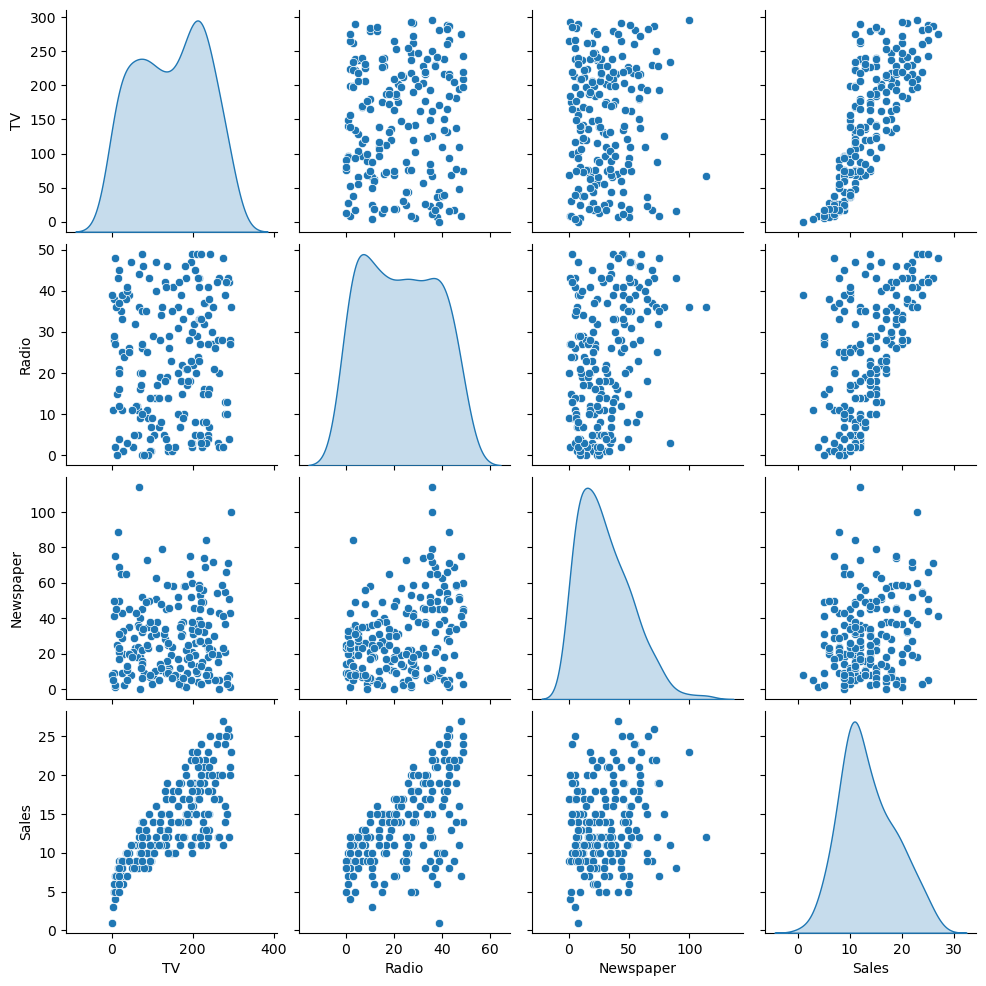

In [12]:
sns.pairplot(data=ds,diag_kind='kde')

In [39]:
# Corelation.
cor=ds.corr()
cor.style.background_gradient()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.055388,0.055569,0.778044
Radio,0.055388,1.000000,0.352552,0.579960
Newspaper,0.055569,0.352552,1.000000,0.229429
Sales,0.778044,0.579960,0.229429,1.000000


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=ds.iloc[:,0:3]
y=ds['Sales']

In [16]:
train1,test1,train2,test2=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
# Scaling.
from sklearn.preprocessing import StandardScaler

In [18]:
scl=StandardScaler()

In [19]:
train1=scl.fit_transform(train1)
test1=scl.transform(test1)

In [20]:
train1

array([[-1.34695206,  1.02963076,  1.65465119],
       [-1.40600948,  0.07461092, -1.29527523],
       [-0.0949348 ,  0.41568944, -0.82703294],
       [ 0.6964346 , -0.19825189, -0.9206814 ],
       [ 0.76730351,  0.00639522,  1.28005736],
       [-0.56739414,  0.41568944, -1.01432986],
       [-1.67767361, -1.42613454, -1.34209946],
       [-1.58318174,  1.37070928,  2.77843268],
       [-0.29573002,  0.89319936,  2.31019039],
       [-0.54377118, -1.22148743,  0.20310009],
       [-0.48471376, -0.6075461 ,  0.06262741],
       [ 0.93266428,  0.62033655,  2.07606925],
       [ 1.21613988, -0.13003618,  0.01580318],
       [ 0.40114751, -0.13003618, -0.35879065],
       [-1.2524602 ,  0.14282663, -0.45243911],
       [-1.03985349, -0.74397751, -0.54608757],
       [ 1.67678774,  0.34747374,  0.62451815],
       [ 0.25940971, -0.33468329,  0.01580318],
       [ 0.61375422, -0.06182048,  0.06262741],
       [-1.68948509,  0.34747374,  0.53086969],
       [ 1.35787769, -1.42613454,  0.624

In [21]:
train2

134    10
66      9
26     15
113    15
168    17
       ..
67     13
192     5
117     9
47     23
172     7
Name: Sales, Length: 160, dtype: int32

In [22]:
# Model Building.
from sklearn.linear_model import LinearRegression

In [23]:
mod=LinearRegression()

In [24]:
mod.fit(train1,train2)

LinearRegression()

In [33]:
# Value prediction.
pred=mod.predict(test1)
print(pred)

[ 9.5712015   6.93026051  6.50931532 23.69210929 11.4448268   5.97858277
 12.31669692 14.62022924 10.41416563 15.88145011 22.43815877  8.56447987
  9.88026165 15.04750051 11.07100187 11.65901033 18.34262032 10.30517367
 15.51945314 16.79587287 23.76078554  8.96583889 14.66640747 11.90202021
  5.26343281 14.78107713 11.85752142 20.61355881 12.89588056  8.55536917
 12.47239091 21.01387738 17.53859511 20.81390311  6.01452345  5.69327245
  7.47871948 12.44073173 14.27604771  5.79336771]


In [27]:
from sklearn.metrics import r2_score

In [29]:
rs=r2_score(test2,pred)
print("R Square Term:",rs*100)

R Square Term: 86.24865742451983


In [37]:
print("Intercept:",mod.intercept_)

Intercept: 13.7375


In [38]:
print("Coefficient:",mod.coef_)

Coefficient: [ 3.77270775  2.92255411 -0.04438437]


<AxesSubplot:xlabel='Sales'>

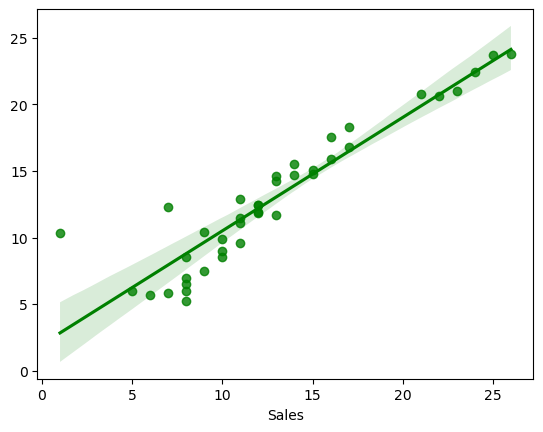

In [32]:
# Plottig In Linear graph.
sns.regplot(data=ds,x=test2,y=pred,color="green")